In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('Weather Data.csv')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [6]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [9]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [10]:
df[['Date', 'Time']] = df['Date/Time'].str.split(' ', expand = True)

In [11]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012,1:00


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00


In [14]:
# Getting seasons and seperating the month into a new column
def get_season(month):
    if month >=3 and month <= 5:
        return 'Spring'
    elif month>= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['Month'] = df['Date'].dt.month
df['Season'] = df['Month'].apply(get_season)

In [15]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time,Month,Season
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00,1,Winter
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00,1,Winter


In [16]:
# Making the month their name value
import calendar

df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

In [17]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time,Month,Season
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00,January,Winter
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00,January,Winter


In [18]:
# Rearranging the columns
data = df[['Date', 'Month', 'Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 
             'Visibility_km', 'Press_kPa', 'Weather', 'Season']]

In [19]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time,Month,Season
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00,January,Winter
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00,January,Winter


In [20]:
# Replacing the column name weather with weather comdition
data.rename(columns = {'Weather': 'Weather Condition'}, inplace = True)

C:\Users\STS\AppData\Local\Temp\ipykernel_4380\896530603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'Weather': 'Weather Condition'}, inplace = True)


In [21]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time,Month,Season
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00,January,Winter
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00,January,Winter


In [22]:
# Checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [23]:
#Checking all the unique values in my dataset
data.nunique()

Date                 366
Month                 12
Time                  24
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather Condition     50
Season                 4
dtype: int64

<Axes: xlabel='Month', ylabel='Temp_C'>

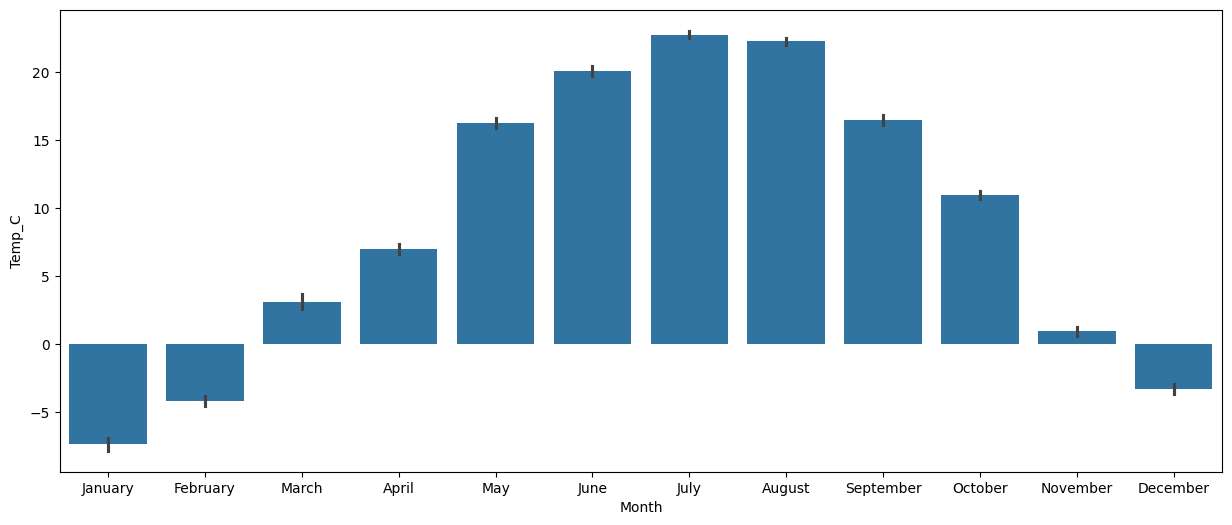

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(x= 'Month', y= 'Temp_C', data= data)

In [2]:
# Checking if there's any relationship between windspeed and time

avg_windspeed = data.groupby('Time')['Wind Speed_km/h'].mean()
plt.figure(figsize=(15, 6))

plt.plot(avg_windspeed.index, avg_windspeed.values)
plt.xlabel('Time')
plt.ylabel('Average Wind Speed')
plt.title('Average Wind Speed Variation Over Time')
plt.grid()

NameError: name 'data' is not defined

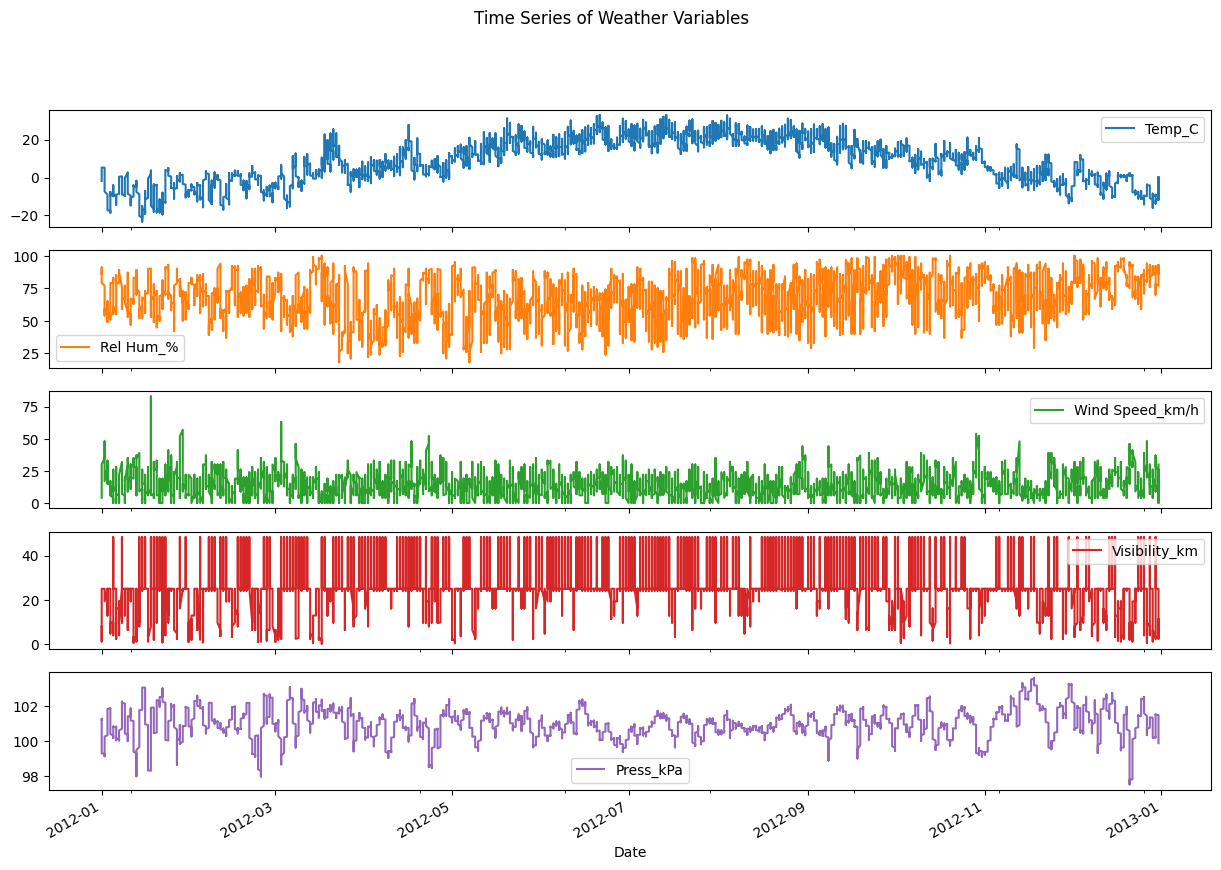

In [26]:
data.set_index('Date', inplace=True)
data[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].plot(subplots=True, figsize=(15, 10))
plt.suptitle('Time Series of Weather Variables')
plt.show()

In [27]:
weather_windspeed = data.groupby('Weather Condition')['Wind Speed_km/h'].mean().reset_index()

In [28]:
weather_windspeed.head(2)

,Weather Condition,Wind Speed_km/h
0,Clear,10.557315
1,Cloudy,16.127315


In [29]:
weather_windspeed = weather_windspeed.sort_values('Wind Speed_km/h', ascending = True)

Text(0.5, 1.0, 'Relationship between Weather Condition and Windspeed')

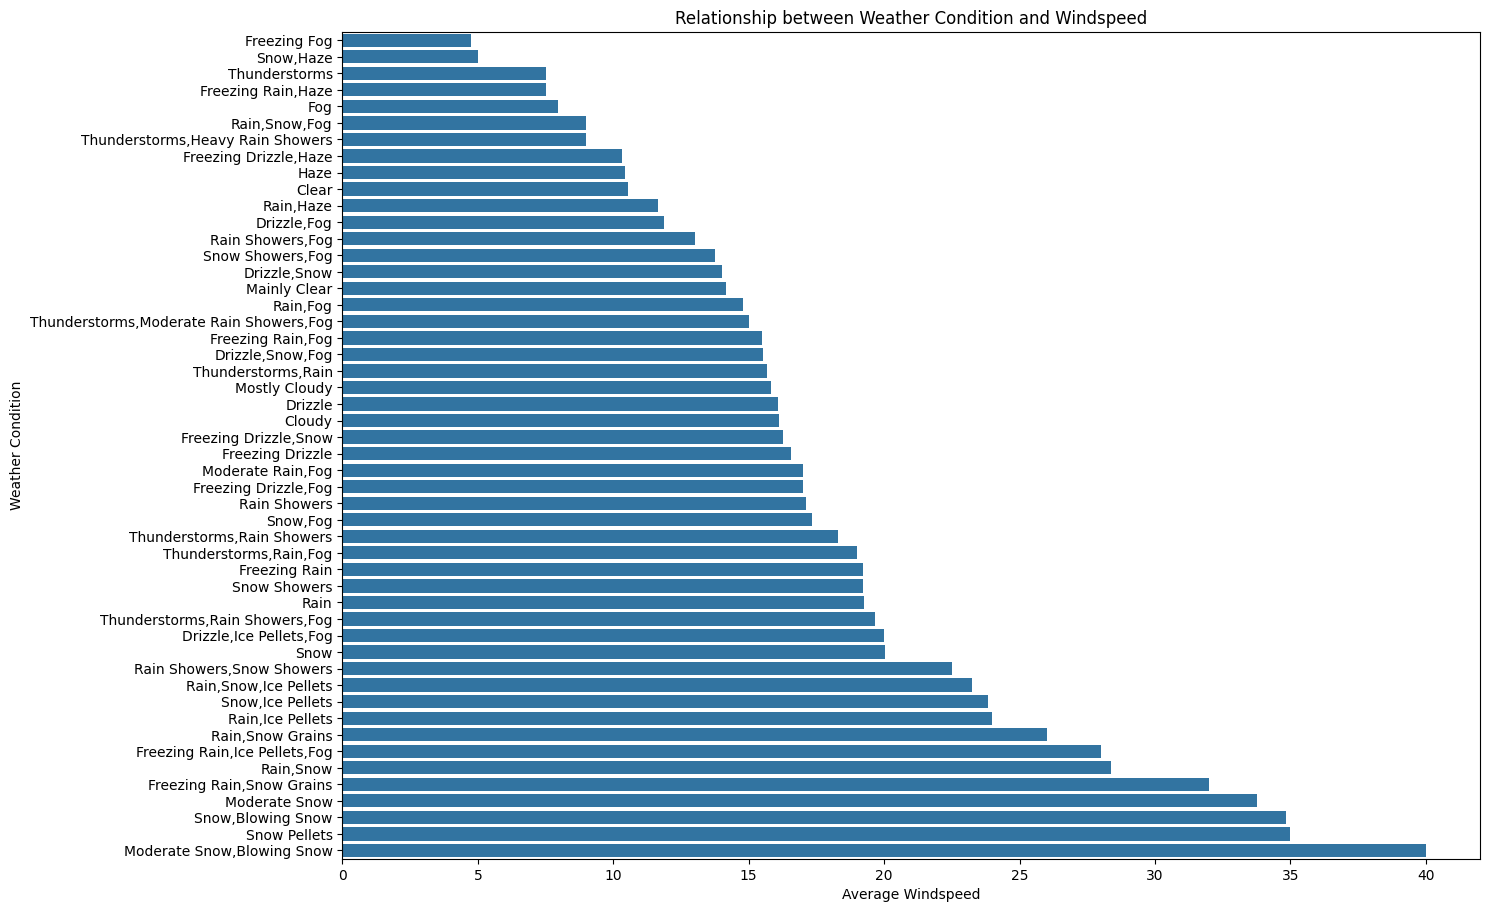

In [30]:
plt.figure(figsize=(15,9))
sns.barplot(x = 'Wind Speed_km/h', y = 'Weather Condition', data = weather_windspeed)
plt.xlabel('Average Windspeed')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.title('Relationship between Weather Condition and Windspeed')

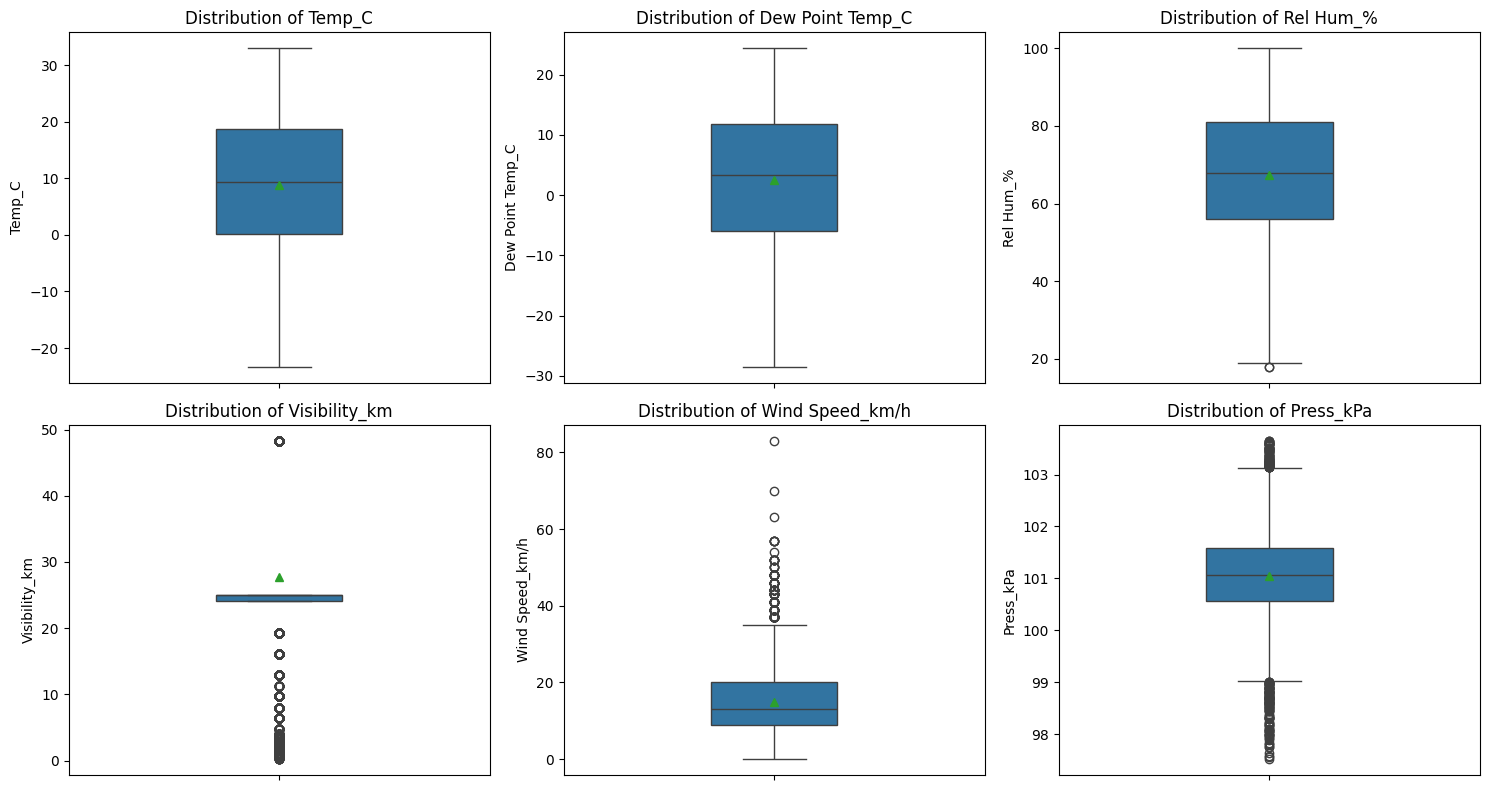

In [31]:
# Parameters to plot
params = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km', 'Wind Speed_km/h', 'Press_kPa']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()  # Flatten the axes array if necessary

# Loop through the list of parameters and create a boxplot for each
for i, param in enumerate(params):
    sns.boxplot(y=param, data=data, width=0.3, showmeans=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {param}')

# Adjust layout
plt.tight_layout()

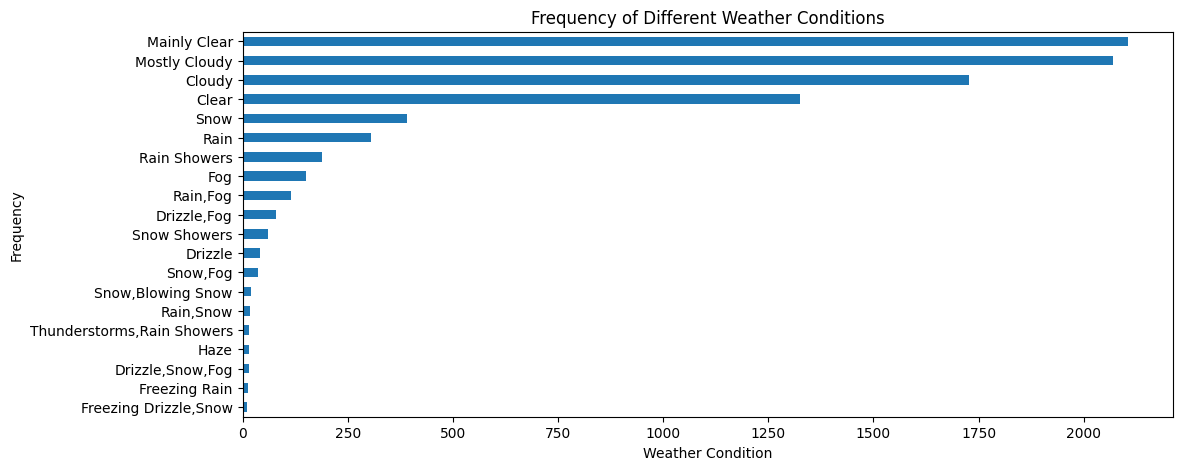

In [32]:
weather_counts = data['Weather Condition'].value_counts(ascending=True)[-20:]
weather_counts.plot(kind='barh', figsize=(12, 5))
plt.title('Frequency of Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()

C:\Users\STS\AppData\Local\Temp\ipykernel_4380\4231697942.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='Weather Condition', y='Count', hue='Season', ci=None)


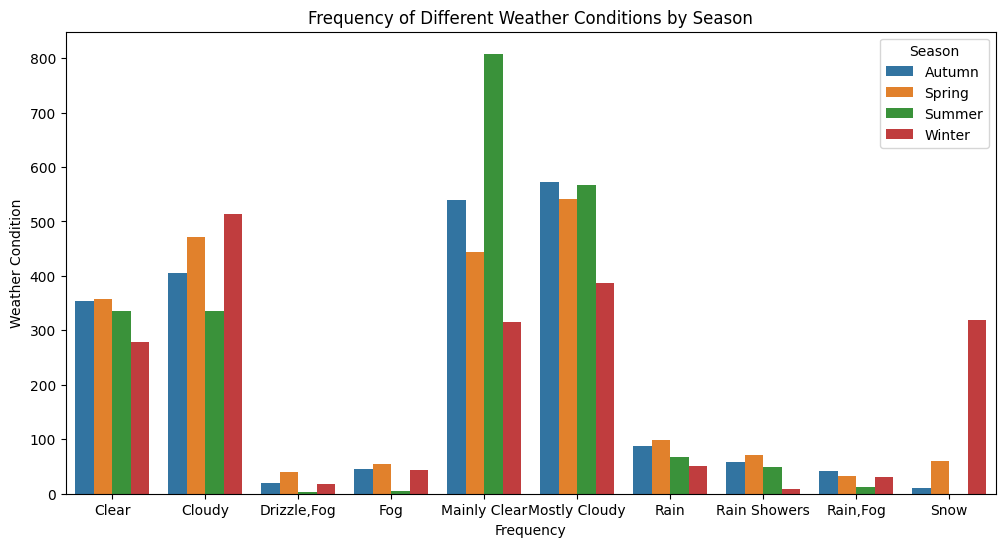

In [33]:
# Grouping the data by 'Season' and 'Weather Condition' and count the occurrences
grouped_data = data.groupby(['Season', 'Weather Condition']).size().reset_index(name='Count')

# Getting the top 20 weather conditions across all seasons
top_conditions = grouped_data.groupby('Weather Condition')['Count'].sum().nlargest(10).index

# Filter the original grouped data to include only the top conditions
filtered_data = grouped_data[grouped_data['Weather Condition'].isin(top_conditions)]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Weather Condition', y='Count', hue='Season', ci=None)
plt.title('Frequency of Different Weather Conditions by Season')
plt.xlabel('Frequency')
plt.ylabel('Weather Condition')
plt.legend(title='Season')
plt.show()

In [34]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time,Month,Season
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00,January,Winter
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00,January,Winter


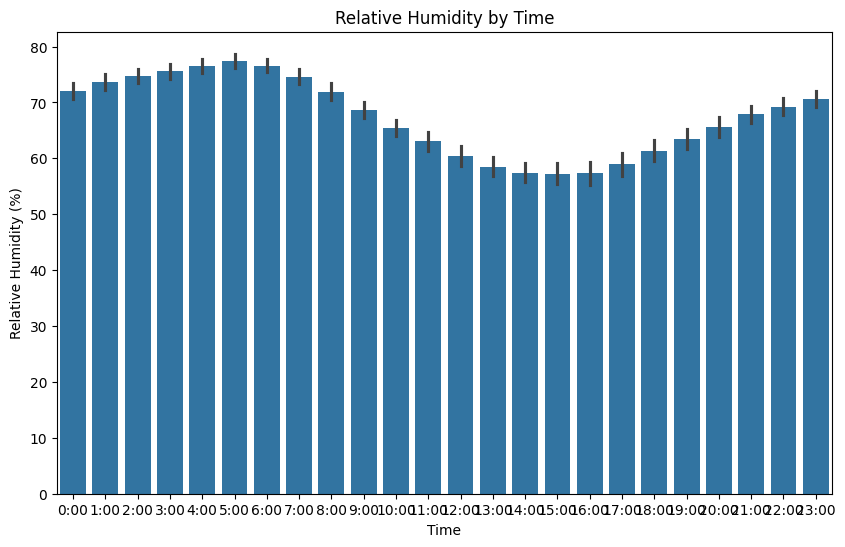

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Time', y='Rel Hum_%', data=df)
plt.title('Relative Humidity by Time')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.show()

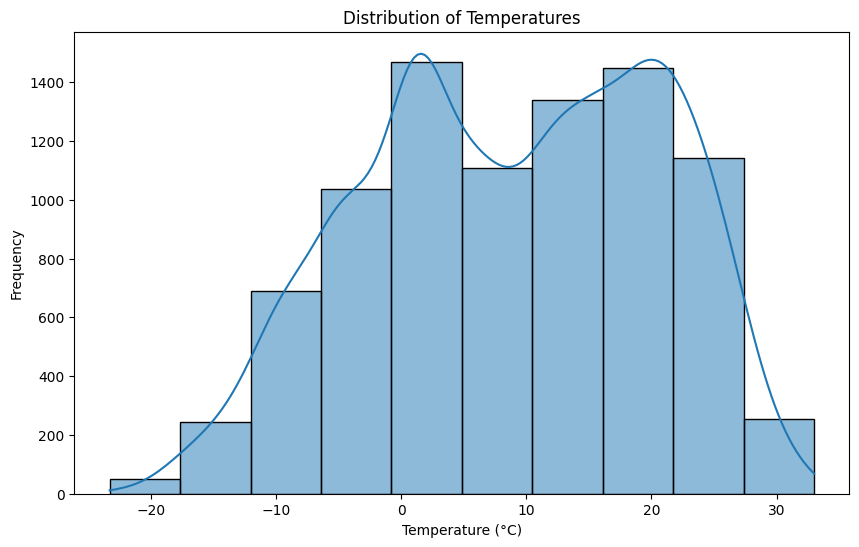

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temp_C'], bins=10, kde=True)
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

In [37]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time,Month,Season
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00,January,Winter
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00,January,Winter


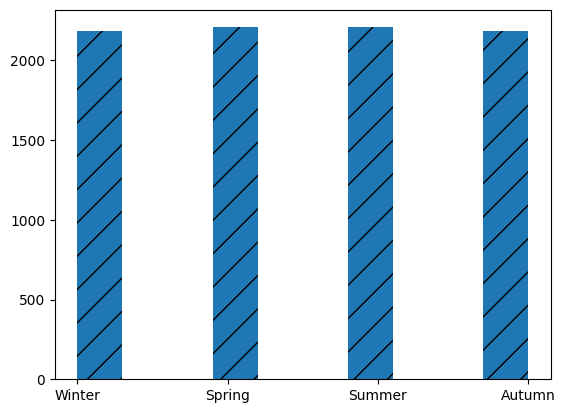

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

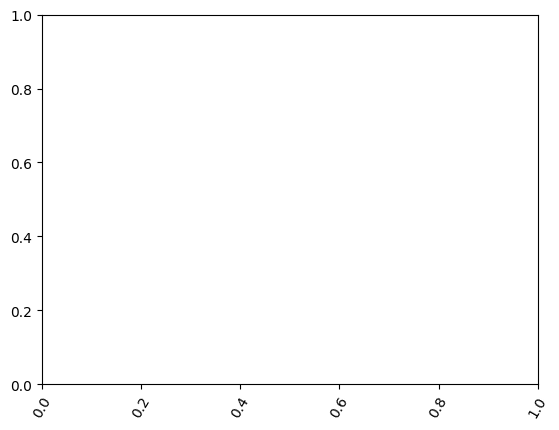

In [44]:
plt.hist(x='Season', data=df, hatch='/')
plt.show()
plt.xticks(rotation=60)

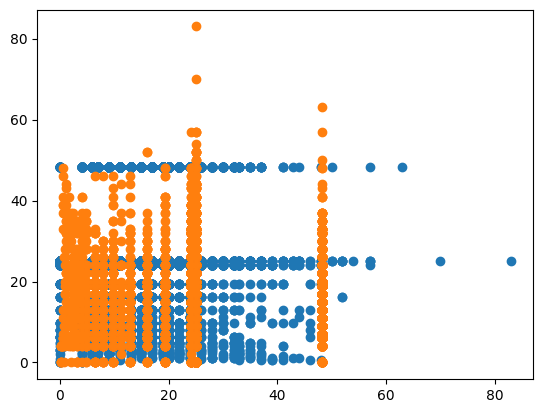

In [54]:
plt.scatter(x='Wind Speed_km/h', y='Visibility_km', data=df)
plt.scatter(x='Visibility_km', y='Wind Speed_km/h', data=df)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Winter'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Autumn'),
  Text(4, 0, 'January'),
  Text(5, 0, 'February'),
  Text(6, 0, 'March'),
  Text(7, 0, 'April'),
  Text(8, 0, 'May'),
  Text(9, 0, 'June'),
  Text(10, 0, 'July'),
  Text(11, 0, 'August'),
  Text(12, 0, 'September'),
  Text(13, 0, 'October'),
  Text(14, 0, 'November'),
  Text(15, 0, 'December')])

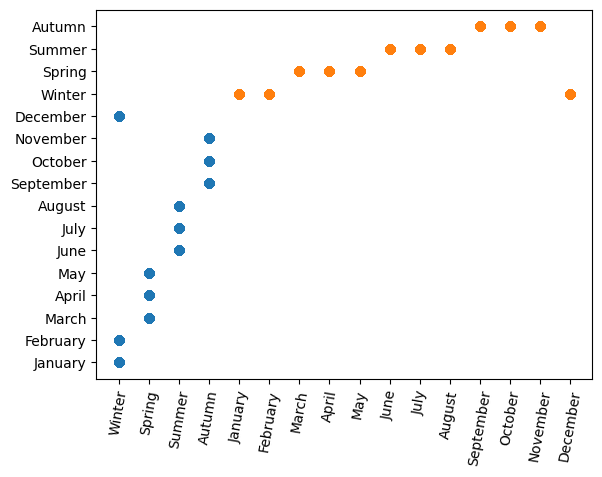

In [56]:
plt.scatter(x='Season', y='Month', data=df)
plt.scatter(x='Month', y='Season', data=df)
plt.xticks(rotation=80)

<Axes: xlabel='Season', ylabel='Month'>

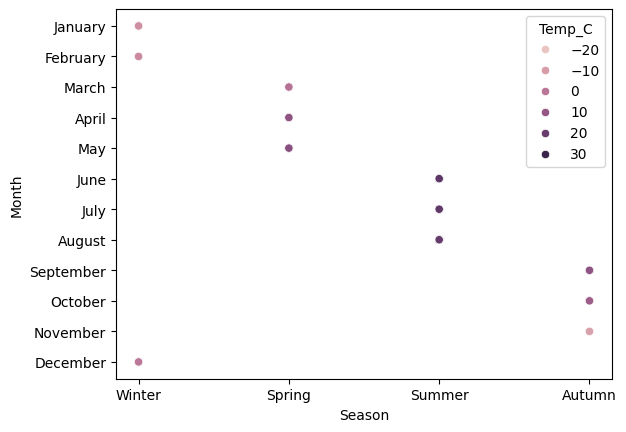

In [57]:
sns.scatterplot(
    data = df,
    x= 'Season',
    y= 'Month',
    hue= 'Temp_C'
    )

<Axes: xlabel='Date', ylabel='Month'>

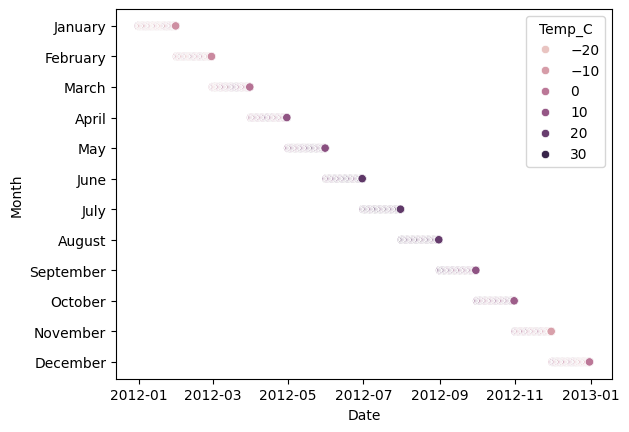

In [58]:
sns.scatterplot(
    data = df,
    x= 'Date',
    y= 'Month',
    hue= 'Temp_C'
    )

<Axes: xlabel='Visibility_km', ylabel='Month'>

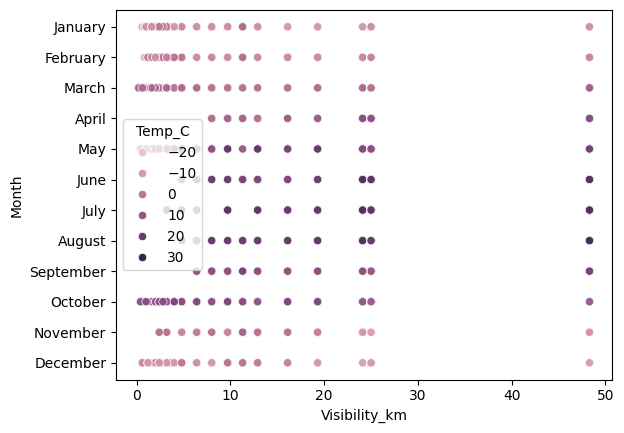

In [64]:
sns.scatterplot(
    data = df,
    x= 'Visibility_km',
    y= 'Month',
    hue= 'Temp_C'
     )

    

<Axes: xlabel='Season', ylabel='Temp_C'>

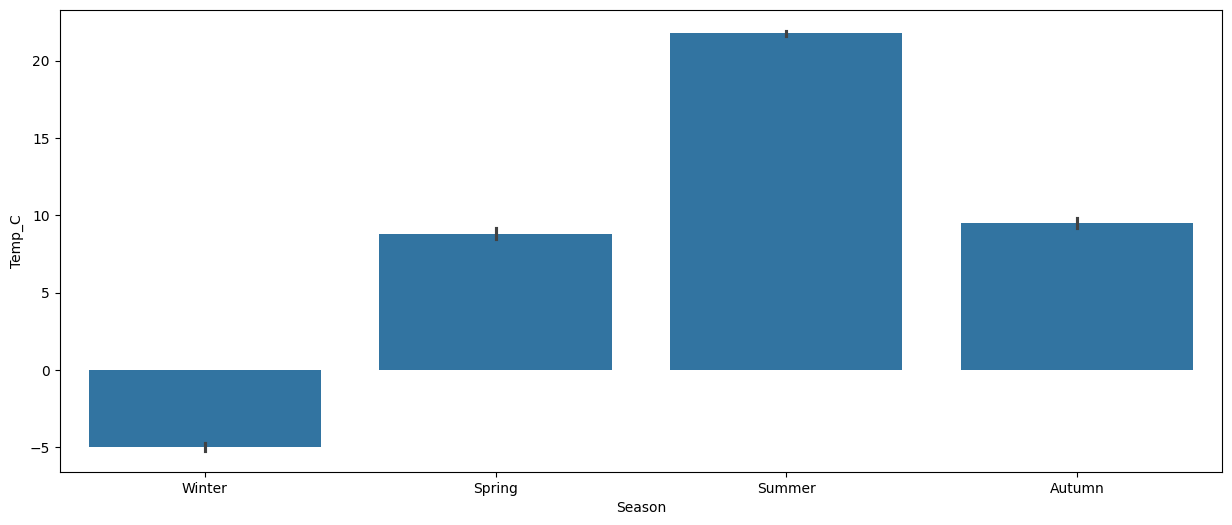

In [65]:
plt.figure(figsize=(15,6))
sns.barplot(x= 'Season', y= 'Temp_C', data= data)

<Axes: xlabel='Date', ylabel='Temp_C'>

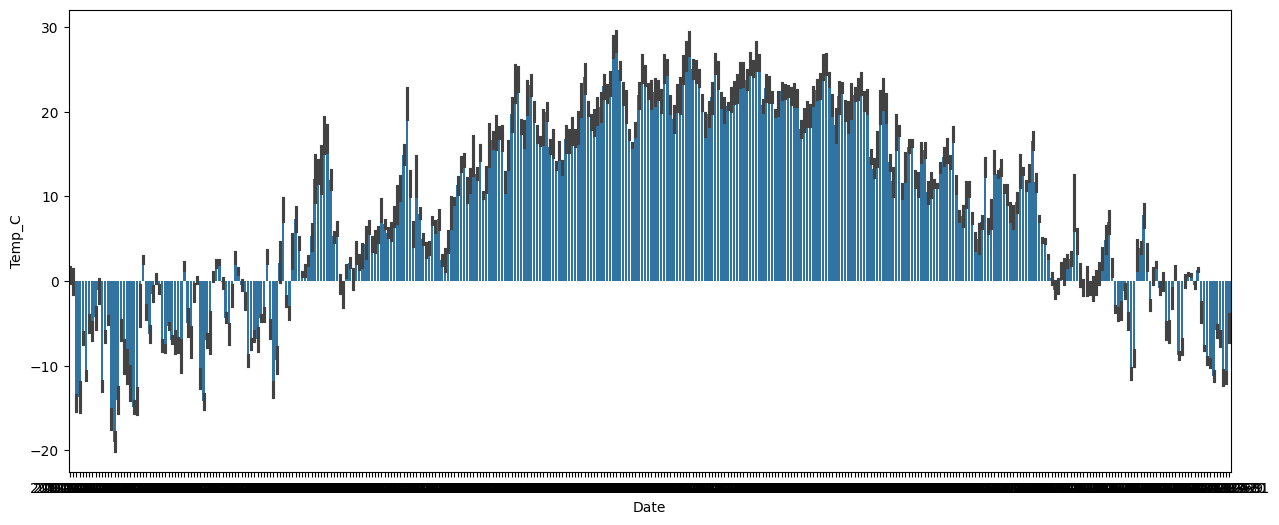

In [67]:
plt.figure(figsize=(15,6))
sns.barplot(x= '', y= 'Temp_C', data= data)